# NR. 3

## LINEAR REGRESSION MODEL

### 1. Packages

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.tsa.api as smt
from scipy.stats import anderson, jarque_bera, kstest, shapiro
from sklearn.feature_selection import RFECV
from sklearn.linear_model import ElasticNetCV, LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

### 2. Reading

In [7]:
df = pd.read_csv('Reg21.csv')
num_cols = len(df.columns)
df = df.set_index('ID', drop=False)
drop_cols = list(range(num_cols-44, num_cols)) + [num_cols-46, num_cols-47]
df = df.drop(df.columns[drop_cols], axis=1)
df = df.rename(columns={'X107': 'x107', 'X102': 'x102'})
print(df.head())

          x1        x2        x3        x4        x5        x6        x7  \
ID                                                                         
1   1.804823  0.833203  0.760047 -0.558157  1.659341  0.289070  0.589375   
2   0.252590  0.731699  0.321262  0.329696 -1.144390 -0.888332 -0.164261   
3  -1.910228 -3.365432 -1.352283 -2.590388 -0.507751  1.517212  0.933134   
4  -0.931659  1.011073  2.088675  2.458212  0.307954  0.357413  0.661196   
5  -0.123769 -0.742483 -0.427894  0.098036  0.225376  2.506169  1.083613   

          x8        x9       x10  ...      x104      x105      x106      x107  \
ID                                ...                                           
1   0.219682 -0.404733 -0.174748  ... -0.435851  1.642974  0.082485  0.619090   
2  -0.921495 -1.948124 -0.875055  ... -0.079548 -1.170860 -1.158642  0.039552   
3   0.811186 -0.219802 -0.355842  ... -2.549045 -0.743645  1.080618  0.500316   
4   0.807506 -0.026005 -0.225084  ...  2.168653  0.390193 -0.3

### 3. Y3 analysis

count    100000.000000
mean         14.008089
std         387.171999
min       -8196.067509
25%         -24.387576
50%          13.154969
75%          52.438061
max        8184.208287
Name: Y3, dtype: float64


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x104,x105,x106,x107,x108,x109,x110,c1,c2,Y3
ID,,,,,,,,,,,,,,,,,,,,,
1,1.804823,0.833203,0.760047,-0.558157,1.659341,0.289070,0.589375,0.219682,-0.404733,-0.174748,...,-0.435851,1.642974,0.082485,0.619090,0.371560,-0.548346,-0.417829,0,3,28.673140
2,0.252590,0.731699,0.321262,0.329696,-1.144390,-0.888332,-0.164261,-0.921495,-1.948124,-0.875055,...,-0.079548,-1.170860,-1.158642,0.039552,-1.013540,-2.143614,-1.229332,0,0,14.711390
3,-1.910228,-3.365432,-1.352283,-2.590388,-0.507751,1.517212,0.933134,0.811186,-0.219802,-0.355842,...,-2.549045,-0.743645,1.080618,0.500316,0.712143,0.174808,-0.426604,0,2,30.152232
4,-0.931659,1.011073,2.088675,2.458212,0.307954,0.357413,0.661196,0.807506,-0.026005,-0.225084,...,2.168653,0.390193,-0.317518,0.110396,1.004494,-0.396521,-0.280177,0,1,9.563833
5,-0.123769,-0.742483,-0.427894,0.098036,0.225376,2.506169,1.083613,-0.123056,-0.185983,-1.193021,...,0.089690,0.314667,2.177583,1.221883,0.093089,0.489752,-1.146850,1,2,-16.799873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,-1.472834,-0.858194,-0.419836,0.733024,0.562859,2.307218,2.003444,1.470396,0.192916,-0.134707,...,0.800042,0.758671,2.434876,2.542841,1.424860,0.510350,-0.074517,1,0,15.101903
99997,-1.050958,-0.415524,-1.146804,0.278612,-0.168169,0.657072,0.828438,1.812560,0.916457,1.665529,...,0.319482,-0.129984,0.447448,0.851424,1.583862,1.285525,1.664624,0,3,28.704298
99998,1.131758,0.709572,-0.797551,-0.546478,0.132748,0.194596,0.847796,0.338463,-1.380175,0.102687,...,-0.979888,-0.101680,0.479959,1.251852,0.458330,-1.508262,-0.140290,0,2,46.857324


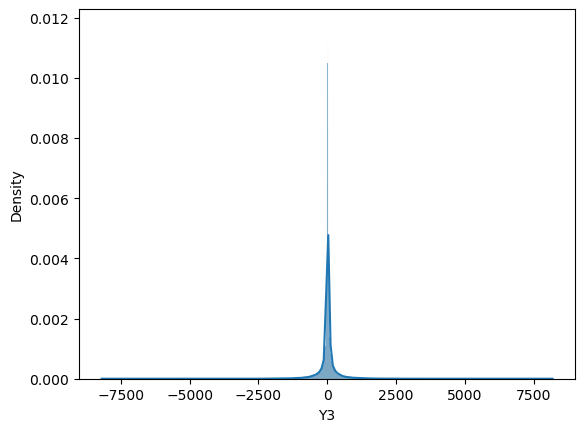

In [8]:
print(df['Y3'].describe())
sns.histplot(df['Y3'], kde=True, stat="density")
df.dropna()

### 4. Scatter plots of the independent variables and the dependent variable Y3

#### 4.1 Before transformation

<Axes: xlabel='x23', ylabel='Y3'>

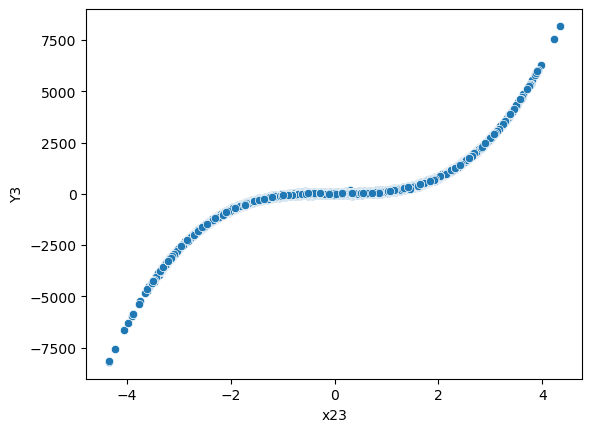

In [9]:
sns.scatterplot(x=df['x23'], y=df['Y3'])
# for i in range(0, 110):
#     sns.scatterplot(x=df.iloc[:, i], y=df['Y3'])
#     plt.xlabel('x' + str(i+1))
#     plt.ylabel('Y3')
#     plt.show()

#### 4.2 After transformation

<Axes: xlabel='x23', ylabel='Y3'>

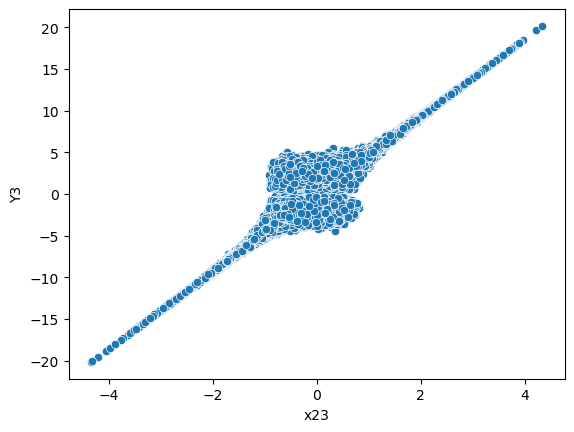

In [10]:
df['Y3'] = np.cbrt(df['Y3'])
sns.scatterplot(x=df['x23'], y=df['Y3'])
# for i in range(0, 110):
#     sns.scatterplot(x=df.iloc[:, i], y=df['Y3'])
#     plt.xlabel('x' + str(i+1))
#     plt.ylabel('Y3')
#     plt.show()

### 5. Adding variables

#### 5.1 Adding C1 interactions with quantitative variables

In [11]:
for i in range(43, 49):
    new_col_name = f"c1_x{i}"
    df[new_col_name] = df['c1'] * df[f'x{i}']
print(df.head())

          x1        x2        x3        x4        x5        x6        x7  \
ID                                                                         
1   1.804823  0.833203  0.760047 -0.558157  1.659341  0.289070  0.589375   
2   0.252590  0.731699  0.321262  0.329696 -1.144390 -0.888332 -0.164261   
3  -1.910228 -3.365432 -1.352283 -2.590388 -0.507751  1.517212  0.933134   
4  -0.931659  1.011073  2.088675  2.458212  0.307954  0.357413  0.661196   
5  -0.123769 -0.742483 -0.427894  0.098036  0.225376  2.506169  1.083613   

          x8        x9       x10  ...      x110  c1  c2        Y3    c1_x43  \
ID                                ...                                         
1   0.219682 -0.404733 -0.174748  ... -0.417829   0   3  3.060730 -0.000000   
2  -0.921495 -1.948124 -0.875055  ... -1.229332   0   0  2.450292  0.000000   
3   0.811186 -0.219802 -0.355842  ... -0.426604   0   2  3.112479 -0.000000   
4   0.807506 -0.026005 -0.225084  ... -0.280177   0   1  2.122645 -0.000

#### 5.2 Adding pairwise interactions between quantitative variables

In [12]:
for i in range(33, 38):
    for j in range(i + 1, 39):
        new_col_name = f"x{i}_x{j}"
        df[new_col_name] = df[f'x{i}'] * df[f'x{j}']
col = df.pop('Y3')
df.insert(len(df.columns), 'Y3', col)
print(df.head())

          x1        x2        x3        x4        x5        x6        x7  \
ID                                                                         
1   1.804823  0.833203  0.760047 -0.558157  1.659341  0.289070  0.589375   
2   0.252590  0.731699  0.321262  0.329696 -1.144390 -0.888332 -0.164261   
3  -1.910228 -3.365432 -1.352283 -2.590388 -0.507751  1.517212  0.933134   
4  -0.931659  1.011073  2.088675  2.458212  0.307954  0.357413  0.661196   
5  -0.123769 -0.742483 -0.427894  0.098036  0.225376  2.506169  1.083613   

          x8        x9       x10  ...   x34_x36   x34_x37   x34_x38   x35_x36  \
ID                                ...                                           
1   0.219682 -0.404733 -0.174748  ...  0.250564 -0.230519 -0.012020 -0.478656   
2  -0.921495 -1.948124 -0.875055  ... -0.347716 -0.512055  0.018546  0.141142   
3   0.811186 -0.219802 -0.355842  ...  1.355724  1.075780 -0.373395  3.179212   
4   0.807506 -0.026005 -0.225084  ... -0.483185  0.089503  0.1

### 6. Correlation

#### 6.1 Correlation between independent variables and dependent variable `Y3` scatter plot

In [13]:
df.corr()['Y3']

x1         0.004801
x2         0.003294
x3         0.010329
x4         0.022968
x5         0.042475
             ...   
x35_x38    0.005876
x36_x37   -0.003780
x36_x38    0.000038
x37_x38   -0.006664
Y3         1.000000
Name: Y3, Length: 134, dtype: float64

#### 6.2 Correlation between independent variables

In [14]:
correlation_matrix = df.corr()
threshold = 0.95
for i in range(len(correlation_matrix.columns)-1):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(
                f"{col1} and {col2} have a correlation coefficient of {correlation_matrix.iloc[i, j]:.2f}. Feature {col1} removed")
            df = df.drop(col1, axis=1)

x101 and x1 have a correlation coefficient of 0.96. Feature x101 removed
x102 and x2 have a correlation coefficient of 0.96. Feature x102 removed
x103 and x3 have a correlation coefficient of 0.96. Feature x103 removed
x104 and x4 have a correlation coefficient of 0.96. Feature x104 removed
x105 and x5 have a correlation coefficient of 0.96. Feature x105 removed
x106 and x6 have a correlation coefficient of 0.96. Feature x106 removed
x107 and x7 have a correlation coefficient of 0.96. Feature x107 removed
x108 and x8 have a correlation coefficient of 0.96. Feature x108 removed
x109 and x9 have a correlation coefficient of 0.96. Feature x109 removed
x110 and x10 have a correlation coefficient of 0.96. Feature x110 removed


### 7. Linear regression

#### 7.1 Testing assumptions

##### 7.1.1 Assumption of linearity

In [15]:
def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    sns.regplot(x=fitted_vals,
                y=y,
                lowess=True,
                ax=ax[0],
                line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=12)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals,
                y=resids,
                lowess=True,
                ax=ax[1],
                line_kws={'color': 'red'})

    ax[1].set_title('Residuals vs. Predicted Values', fontsize=12)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

##### 7.1.2 Assumption on outliers

In [16]:
def outlier_removal(model, X, y):
    influence = model.get_influence()
    cook_d = influence.cooks_distance[0]
    mean_cook_d = cook_d.mean()
    outliers = np.where(cook_d > 6 * mean_cook_d)[0]
    X = X.drop(X.index[outliers])
    y = y.drop(y.index[outliers])
    return X, y

##### 7.1.3 Assumption that the residual is 0

In [17]:
def residual_mean_test(model):
    print(f"Residual mean: {model.resid.mean()}")

##### 7.1.4 Assumption of multicollinearity

In [18]:
def multicollinearity_test(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(pd.DataFrame({'vif': vif[1:]}, index=X.iloc[:, 1:].columns).T)

##### 7.1.5 The assumption of homoskedasticity

In [19]:
def homoscedasticity_test(model):

    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    # fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # sns.regplot(x=fitted_vals, y=resids, lowess=True,
    #             ax=ax[0], line_kws={'color': 'red'})
    # ax[0].set_title('Residuals vs Fitted', fontsize=16)
    # ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    # sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)),
    #             lowess=True, ax=ax[1], line_kws={'color': 'red'})
    # ax[1].set_title('Scale-Location', fontsize=16)
    # ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog),
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

##### 7.1.6 Autocorrelation assumption

In [20]:
def autocorelation_test(model):
    acf = smt.graphics.plot_acf(model.resid, lags=12, alpha=0.05)
    plt.show()
    dw = sm.stats.durbin_watson(model.resid, axis=0)
    print("Durbin-Watson test statistic:", dw)

##### 7.1.7 Assumption of normality of residuals

In [21]:
def normality_of_residuals_test(model):
    sm.ProbPlot(model.resid).qqplot(line='s')
    plt.title('Q-Q plot')

    jb = jarque_bera(model.resid)
    sw = shapiro(model.resid)
    ad = anderson(model.resid, dist='norm')
    ks = kstest(model.resid, 'norm')

    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(
        f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(
        f'Kolmogorov-Smirnov test ---- statistic: {
            ks.statistic:.4f}, p-value: {ks.pvalue:.4f}'
    )
    print(
        f'Anderson-Darling test ---- statistic: {
            ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}'
    )
    print(
        'If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected.'
    )

#### 7.2 Linear regression model using LassoCV

                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 1.925e+05
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:00:37   Log-Likelihood:            -1.6552e+05
No. Observations:               97155   AIC:                         3.311e+05
Df Residuals:                   97148   BIC:                         3.311e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9192      0.006    153.259      0.0

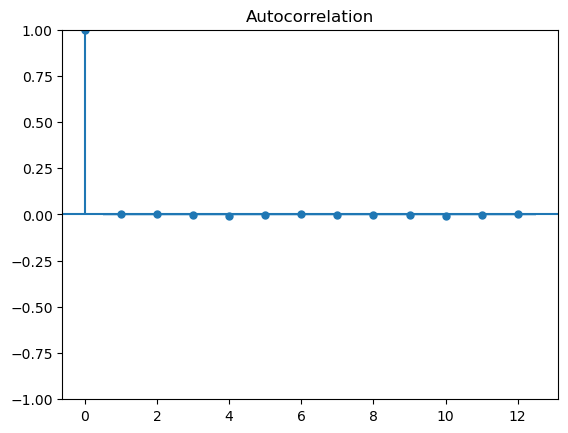

Durbin-Watson test statistic: 1.9928014526182025
Jarque-Bera test ---- statistic: 11188.8497, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9360, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.1382, p-value: 0.0000
Anderson-Darling test ---- statistic: 2679.1240, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected.
               0         1
const   0.907430  0.930941
x5      0.051621  0.071106
x6      0.263198  0.282744
x23     4.483014  4.499694
x44    -0.010242  0.013622
c1     -0.182810 -0.149367
c1_x44  0.981887  1.016546
95% CL for mean: (2.074902741897542, 2.133947383418844)
95% CL for prediction: (-0.5014487650769857, 4.710298890393371)


d:\Users\vitva\miniconda3\envs\daugiamate\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 97155.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\vitva\AppData\Local\Temp\ipykernel_21568\4010888457.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_ci = model.get_prediction(observation).summary_frame(
C:\Users\vitva\AppData\Local\Temp\ipykernel_21568\4010888457.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha=0.05)['mean_ci_lower'][0], model.get_prediction(
C:\Users\vitva\AppData\Local\Temp\ip

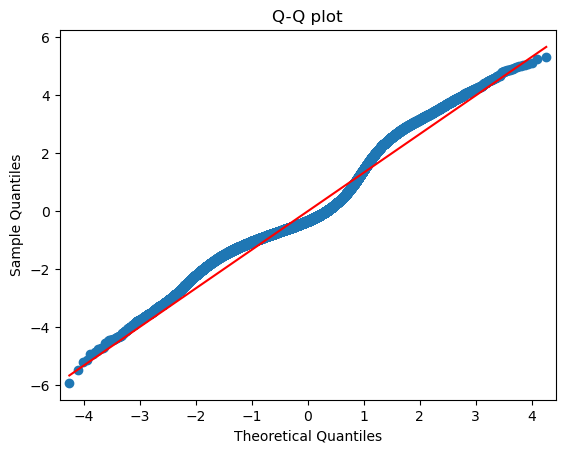

In [23]:
X = df.iloc[:, :-1]
y = df['Y3']

lasso_cv = LassoCV(cv=5, random_state=0, alphas=[0.05, 0.07, 0.08])
lasso_cv.fit(X, y)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_cv.coef_
})
coefficients = coefficients[coefficients.Coefficient != 0]
X = df[coefficients['Feature']].iloc[:, :-1]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

X, y = outlier_removal(model, X, y)
model = sm.OLS(y, X).fit()
print(model.summary())

# linearity_test(model, y)
residual_mean_test(model)
multicollinearity_test(X)
homoscedasticity_test(model)
autocorelation_test(model)
normality_of_residuals_test(model)

confidence_intervals = model.conf_int(alpha=0.05)
print(confidence_intervals)

observation = X.iloc[2]
# Calculate the 95% confidence interval for the mean response
mean_ci = model.get_prediction(observation).summary_frame(
    alpha=0.05)['mean_ci_lower'][0], model.get_prediction(
        observation).summary_frame(alpha=0.05)['mean_ci_upper'][0]
print("95% CL for mean:", mean_ci)

# Calculate the 95% prediction interval for a new observation
pred_ci = model.get_prediction(observation).summary_frame(
    alpha=0.05)['obs_ci_lower'][0], model.get_prediction(
        observation).summary_frame(alpha=0.05)['obs_ci_upper'][0]
print("95% CL for prediction:", pred_ci)

#### 7.3 Linear regression model using RFECV

          x5        x6       x23  c1  c2    c1_x44   x33_x34   x33_x35  \
ID                                                                       
1   1.659341  0.289070  0.500992   0   3 -0.000000  0.194785 -0.372101   
2  -1.144390 -0.888332  0.513112   0   0  0.000000 -0.116291  0.047204   
3  -0.507751  1.517212  0.179262   0   2 -0.000000  0.500637  1.174009   
4   0.307954  0.357413 -0.344260   0   1 -0.000000  0.930661 -0.370780   
5   0.225376  2.506169  0.325092   1   2 -2.249672 -0.140677 -0.111459   

     x34_x35   x34_x36   x35_x36  
ID                                
1  -0.229824  0.250564 -0.478656  
2  -0.046227 -0.347716  0.141142  
3   0.887422  1.355724  3.179212  
4  -0.390353 -0.483185  0.192504  
5   0.039998  0.050812  0.040259  
                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929

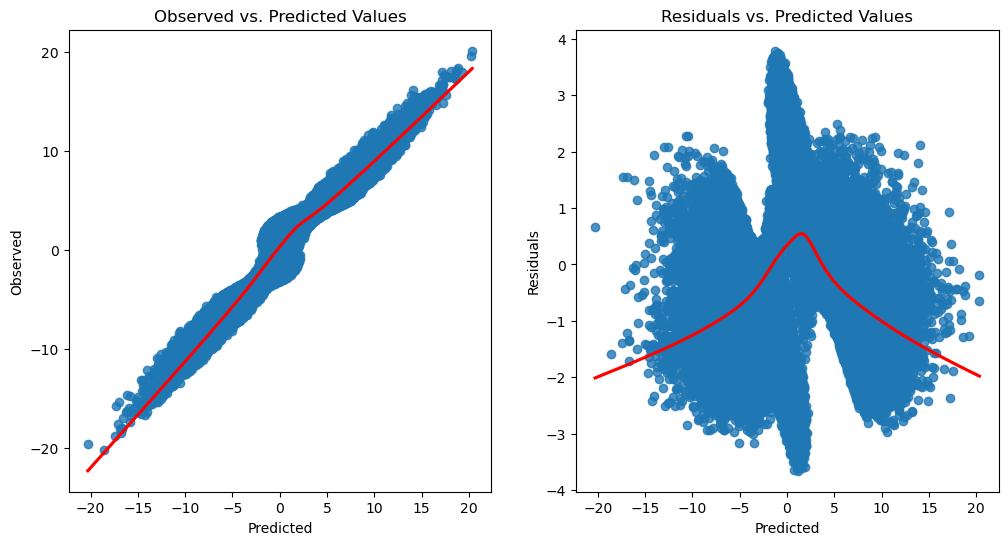

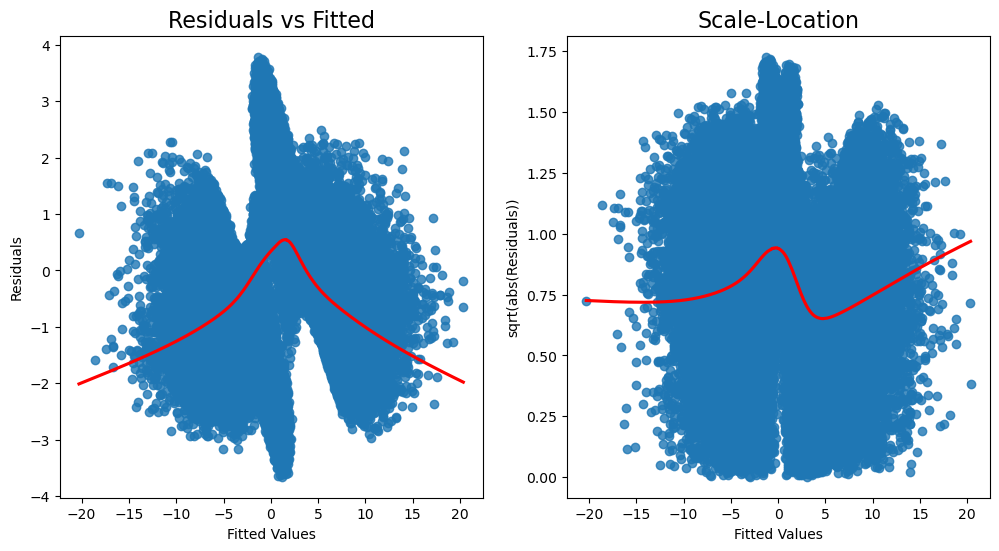

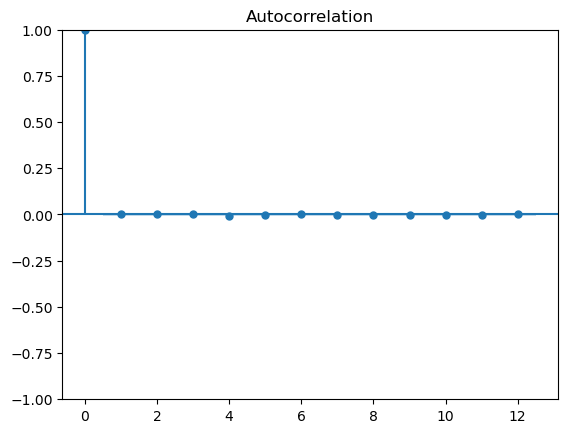

Durbin-Watson test statistic: 1.9955580758863254
Jarque-Bera test ---- statistic: 7519.0199, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9477, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.1159, p-value: 0.0000
Anderson-Darling test ---- statistic: 2119.0404, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected.


d:\Users\vitva\miniconda3\envs\daugiamate\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


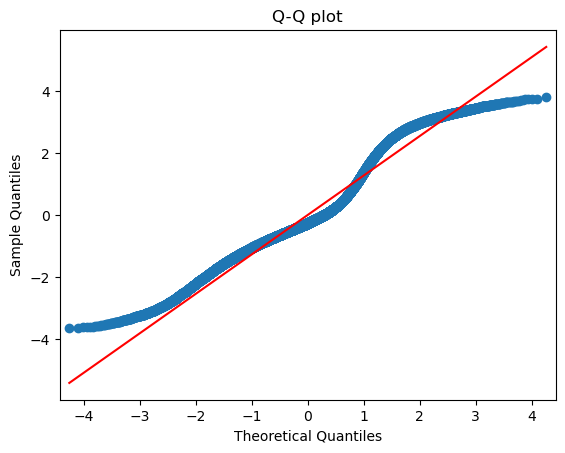

In [ ]:
X = df.iloc[:, :-1]
y = df['Y3']

rfe_cv = RFECV(linear_model.LinearRegression(
), min_features_to_select=5, cv=5, n_jobs=-1, step=1)
rfe_cv.fit(X, y)
selected_features = X.columns[rfe_cv.support_]
X = X.loc[:, selected_features]
print(X.head())

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

X, y = outlier_removal(model, X, y)
model = sm.OLS(y, X).fit()
print(model.summary())

linearity_test(model, y)
residual_mean_test(model)
multicollinearity_test(X)
homoscedasticity_test(model)
autocorelation_test(model)
normality_of_residuals_test(model)

#### 7.3 Linear regression model using ElasticNetCV


                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.660e+05
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        16:50:57   Log-Likelihood:            -1.6498e+05
No. Observations:               96996   AIC:                         3.300e+05
Df Residuals:                   96988   BIC:                         3.300e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8349      0.004    196.104      0.0

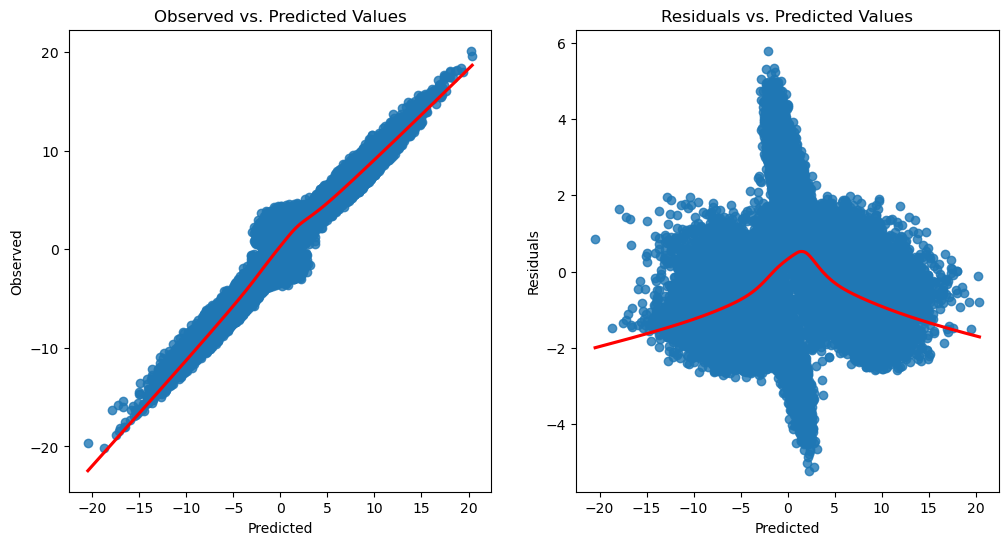

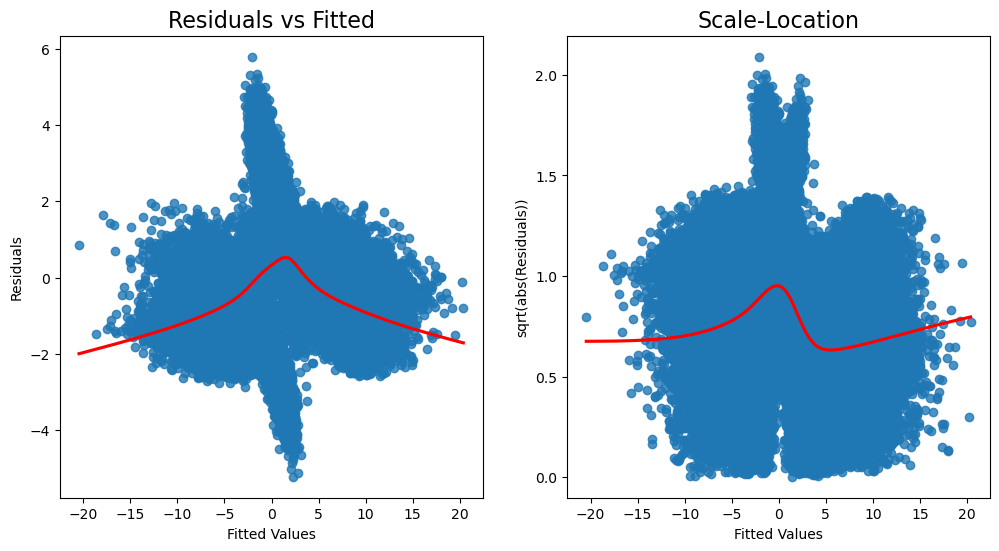

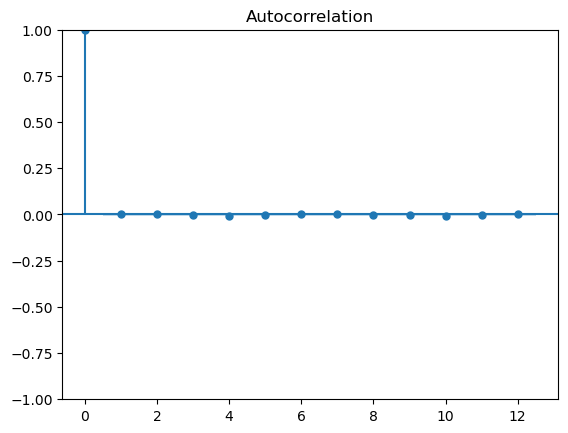

Durbin-Watson test statistic: 1.993049129875205
Jarque-Bera test ---- statistic: 10958.3254, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9368, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.1397, p-value: 0.0000
Anderson-Darling test ---- statistic: 2693.7784, 5% critical value: 0.7870
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected.


d:\Users\vitva\miniconda3\envs\daugiamate\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


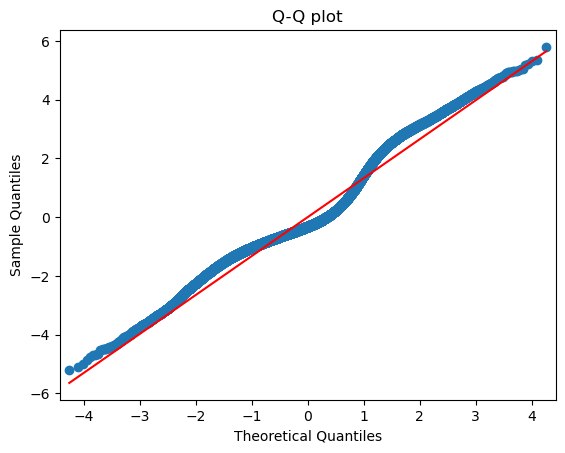

In [ ]:
X = df.iloc[:, :-1]
y = df['Y3']

elastic_net_cv = ElasticNetCV(cv=5, random_state=0, alphas=[0.2, 0.3, 0.4])
elastic_net_cv.fit(X, y)

coefficients = pd.DataFrame(
    {'Feature': X.columns, 'Coefficient': elastic_net_cv.coef_})
coefficients = coefficients[coefficients.Coefficient != 0]
X = df[coefficients['Feature']].iloc[:, :-1]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

X, y = outlier_removal(model, X, y)
model = sm.OLS(y, X).fit()
print(model.summary())

linearity_test(model, y)
residual_mean_test(model)
multicollinearity_test(X)
homoscedasticity_test(model)
autocorelation_test(model)
normality_of_residuals_test(model)